In [1]:
import numpy as np
import matplotlib.pyplot as plt
from maxpy.algorithms import *
from maxpy.utils import save_as_vti

size = 32
linx = np.linspace(-4, 4, size)
liny = np.linspace(-4, 4, size)
linz = np.linspace(-3, 3, size)

origin = [linx[0], liny[0], linz[0]]
spacing = [linx[1] - linx[0], liny[1] - liny[0], linz[1] - linz[0]]

x, y, z = np.meshgrid(linx, liny, linz, indexing="ij")

field = np.array([
    (y -2) ** 2 - 1 + z**2,
    -x,
    np.ones(x.shape) * 0.1
])

In [2]:
result = get_parallel_vector_operator(field, linx, liny, linz)
save_as_vti(result, None, origin=origin, spacing=spacing, savepath="~/Temp/", name="book1-parallel-vectors")

result = get_shear_layer(field, linx, liny, linz)
save_as_vti(result, None, origin=origin, spacing=spacing, savepath="~/Temp/", name="book1-shear-layer")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (32768,) and arg 1 with shape (32, 32, 32).

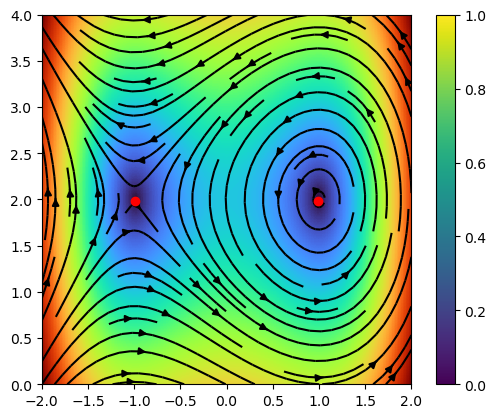

In [16]:
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

u = np.sqrt(field[1, :, :, 64] ** 2 + field[0, :, :, 64] ** 2)

coordinates = peak_local_max(-u, min_distance=20)

plt.imshow(u, cmap="turbo", extent=[-2, 2, 0, 4])
plt.streamplot(x[:, :, 0].T, y[:, :, 0].T, field[1, :, :, 64], field[0, :, :, 64], color="black")
plt.plot(linx[coordinates[:, 1]], liny[coordinates[:, 0]], "ro")
plt.colorbar()